<a href="https://colab.research.google.com/github/mohini-pasi/ML/blob/main/Life_Expectancy_Full_Shishir_Salunkhe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Life Expectancy Analysis
**Author:** Shishir Salunkhe

In [55]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


In [56]:
# Step 2: Load Dataset
df = pd.read_csv(r"/content/Life_Expectancy_Data.csv")
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [45]:
 #Step 3: Basic Info
 # Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [46]:
# Description
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [47]:
# Check Missing Values
df.isnull().sum()

,0
Country,0
Year,0
Status,0
Life expectancy,10
Adult Mortality,10
infant deaths,0
Alcohol,194
percentage expenditure,0
Hepatitis B,553
Measles,0


In [57]:
# Step 4: Rename Columns (optional)
# ========================
df.rename(columns={'Life expectancy ': 'Life_Expectancy'}, inplace=True)

In [58]:
# Step 5: Check & Handle Missing Values
# ========================
print(df.isnull().sum())

Country                              0
Year                                 0
Status                               0
Life_Expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64


In [62]:
# Strip all column names
df.columns = df.columns.str.strip()


In [66]:
# Fill remaining missing values
df['Life_Expectancy'].fillna(df['Life_Expectancy'].mean(), inplace=True)
df['BMI'].fillna(df['BMI'].mean(), inplace=True)
df['Alcohol'].fillna(df['Alcohol'].mean(), inplace=True)
df['Adult Mortality'].fillna(df['Adult Mortality'].mean(), inplace=True)
df['Total expenditure'].fillna(df['Total expenditure'].mean(), inplace=True)
df['Population'].fillna(df['Population'].mean(), inplace=True)
df['thinness  1-19 years'].fillna(df['thinness  1-19 years'].mean(), inplace=True)
df['thinness 5-9 years'].fillna(df['thinness 5-9 years'].mean(), inplace=True)
df['Income composition of resources'].fillna(df['Income composition of resources'].mean(), inplace=True)
df['Schooling'].fillna(df['Schooling'].mean(), inplace=True)

/tmp/ipython-input-66-2123828699.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Life_Expectancy'].fillna(df['Life_Expectancy'].mean(), inplace=True)
/tmp/ipython-input-66-2123828699.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method

In [67]:
# Verify
print(df.isnull().sum())


Country                            0
Year                               0
Status                             0
Life_Expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness  1-19 years               0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64


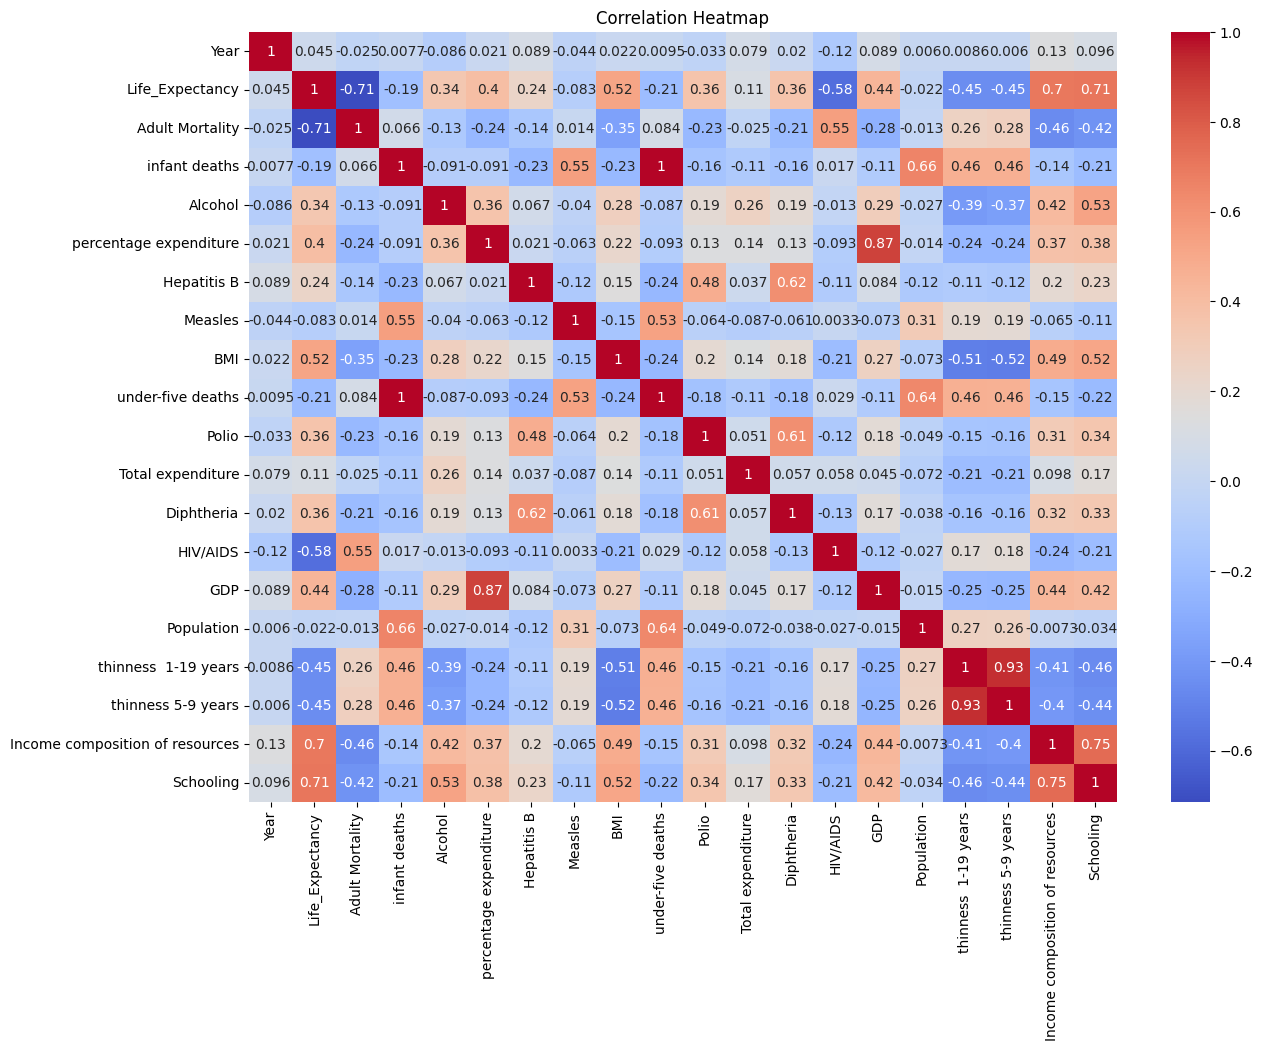

In [69]:
# ✅ Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# ✅ Now plot heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


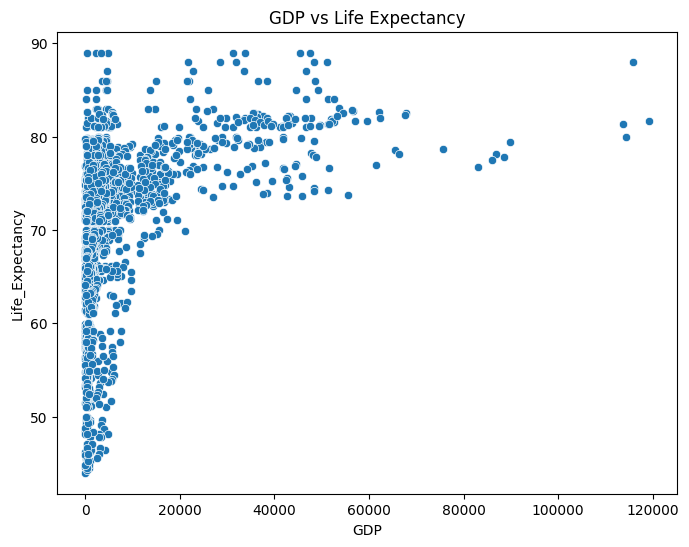

In [70]:
# Scatter Plots
plt.figure(figsize=(8,6))
sns.scatterplot(x='GDP', y='Life_Expectancy', data=df)
plt.title("GDP vs Life Expectancy")
plt.show()

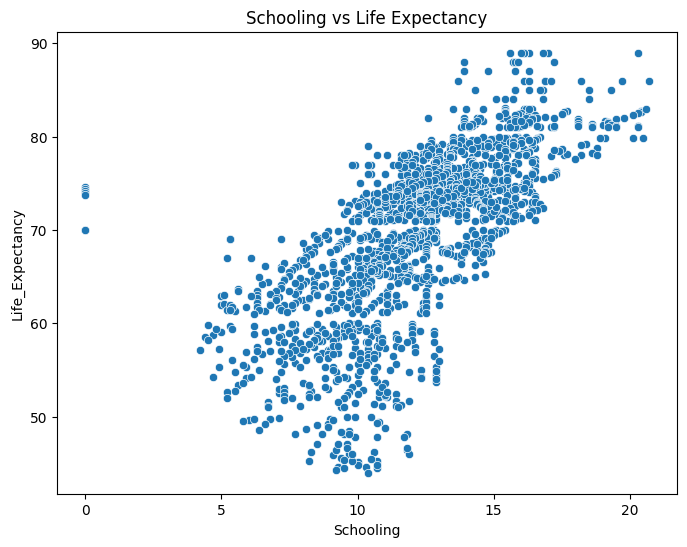

In [71]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Schooling', y='Life_Expectancy', data=df)
plt.title("Schooling vs Life Expectancy")
plt.show()

In [75]:
features = [
    'GDP',
    'Schooling',
    'Alcohol',
    'BMI',
    'infant deaths',
    'Polio',
    'Hepatitis B'
]

X = df[features]
y = df['Life_Expectancy']


In [76]:

# Add constant for statsmodels
X_sm = sm.add_constant(X)
model = sm.OLS(y, X_sm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_Expectancy   R-squared:                       0.570
Model:                            OLS   Adj. R-squared:                  0.568
Method:                 Least Squares   F-statistic:                     379.6
Date:                Tue, 22 Jul 2025   Prob (F-statistic):               0.00
Time:                        15:36:23   Log-Likelihood:                -6334.3
No. Observations:                2014   AIC:                         1.268e+04
Df Residuals:                    2006   BIC:                         1.273e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            43.1198      0.723     59.635

In [77]:
# ========================
# Step 8: Predictive Model (Sklearn)
# ========================

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit Model
reg = LinearRegression()
reg.fit(X_train, y_train)

# Predict
y_pred = reg.predict(X_test)

# Evaluation Metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R² Score: {r2:.3f}")
print(f"MAE: {mae:.3f}")
print(f"RMSE: {rmse:.3f}")

R² Score: 0.542
MAE: 4.149
RMSE: 5.662


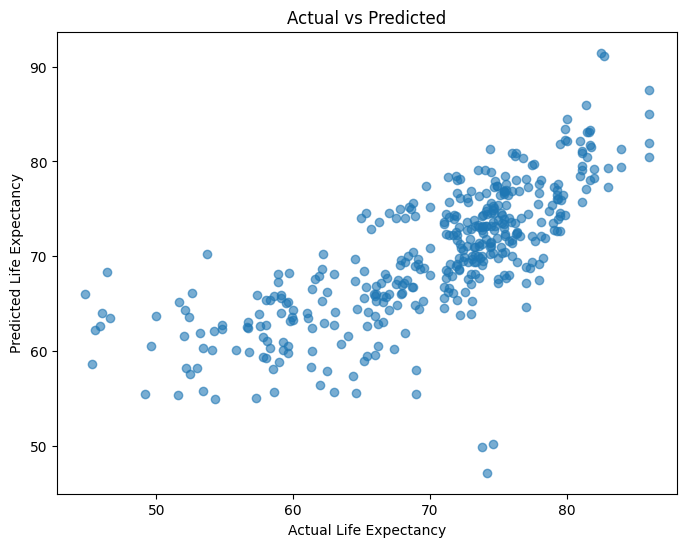

In [78]:
# Step 9: Visualize Predictions
# ========================
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual Life Expectancy")
plt.ylabel("Predicted Life Expectancy")
plt.title("Actual vs Predicted")
plt.show()

In [79]:
coef_df = pd.DataFrame({
    "Feature": features,
    "Coefficient": reg.coef_
})
print(coef_df)

         Feature  Coefficient
0            GDP     0.000107
1      Schooling     1.666520
2        Alcohol    -0.159455
3            BMI     0.081322
4  infant deaths     0.000499
5          Polio     0.041783
6    Hepatitis B     0.003212


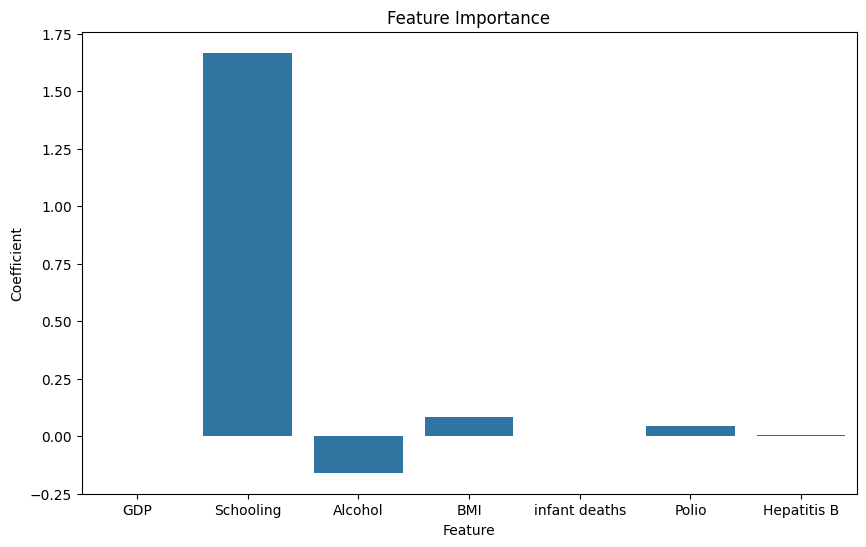

In [80]:
plt.figure(figsize=(10,6))
sns.barplot(x='Feature', y='Coefficient', data=coef_df)
plt.title("Feature Importance")
plt.show()


In [81]:
df.to_csv("Cleaned_Life_Expectancy.csv", index=False)